# Analyzing Time-series Data with FTGPs

We use time-series decomposition to try to explain/analyze the quality of our FTGPs. Time-series decomposition helps us break down a time-series dataset into three main components:

**1. Trend:** The trend component represents the long-term movement in the data, representing the underlying pattern.

**2. Seasonality:** The seasonality component represents the repeating, short-term fluctuations caused by factors like seasons or cycles.

**3. Residual (Noise):** The residual component represents random variability that remains after removing the trend and seasonality.

By separating these components, we can gain insights into the behavior of the data and make better forecasts. 

## Types of Time Series Decomposition Techniques

### a) Additive Decomposition

* In additive decomposition, the time series is expressed as the sum of its components. It’s suitable when the magnitude of seasonality doesn’t vary with the magnitude of the time series.

$$Y(t) = Trend(t) + Seasonal(t) + Residual(t)$$

### b) Multiplicative Decomposition

* In multiplicative decomposition, the time series is expressed as the product of its components.It’s suitable when the magnitude of seasonality scales with the magnitude of the time series.

$$Y(t) = Trend(t) * Seasonal(t) * Residual(t)$$

## Methods of Decomposition
### a) Moving Averages

* Moving averages involve calculating the average of a certain number of past data points. It helps smooth out fluctuations and highlight trends.

### b) Seasonal Decomposition of Time Series

* The Seasonal and Trend decomposition using Loess (STL) is a popular method for decomposition, which uses a combination of local regression (Loess) to extract the trend and seasonality components.

### c) Exponential Smoothing State Space Model

* This method involves using the ETS framework to estimate the trend and seasonal components in a time series.

## Reference
* https://www.geeksforgeeks.org/time-series-decomposition-techniques/


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Import from local directory
import sys

sys.path.insert(0, '../src')
from TemporalGP.TGP.tgrad_ami import TGradAMI
from TemporalGP.TGP.t_graank import TGrad

In [9]:
# Hyperparameters

f_path = "../datasets/air_quality1k.csv"
eq = False
min_sup = 0.5
tgt_col = 2
min_rep = 0.5
num_cores = 4

In [3]:
data = pd.read_csv(f_path)
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [10]:
tgp = TGradAMI(f_path, eq, min_sup, tgt_col, min_rep, num_cores)
# tgp.full_attr_data

Dataset Ok


In [12]:
list_tgp = []  #tgp.discover_tgp(parallel=True)


Largest step delay: 816

Optimal Dict: {3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 349, 13: 816, 14: 384}

Time Lags: [[   3600.    3600.    3600. ...    3600.    3600.    3600.]
 [   3600.    3600.    3600. ...    3600.    3600.    3600.]
 [   3600.    3600.    3600. ...    3600.    3600.    3600.]
 ...
 [1256400. 1256400. 1256400. ... 1256400. 1256400. 1256400.]
 [2937600. 2937600. 2937600. ... 2937600. 2937600. 2937600.]
 [1382400. 1382400. 1382400. ... 1382400. 1382400. 1382400.]]



C:\Users\owuordickson\owProjects\t-graank\.venv_gp\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (25). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Membership Function: 0.0, 733500.0000000001, 1467000.0



In [13]:
output_txt = ""
for txt in tgp.titles:
    col = int(txt[0])
    if col == tgt_col:
        output_txt += (str(txt[0]) + '. ' + str(txt[1].decode()) + '**' + '\n')
    else:
        output_txt += (str(txt[0]) + '. ' + str(txt[1].decode()) + '\n')

count = 0
if isinstance(tgp, TGradAMI):
    if list_tgp:
        count = len(list_tgp)
        for tgp in list_tgp:
            output_txt += f"{tgp.to_string()} :  {tgp.support}\n"
else:
    for obj in list_tgp:
        if obj:
            for tgp in obj:
                count += 1
                # output_txt += (str(tgp.to_string()) + ' : ' + str(tgp.support) +
                #               ' | ' + str(tgp.time_lag.to_string()) + '\n')
                output_txt += f"{tgp.to_string()} :  {tgp.support}\n"

print(output_txt)

0. Date
1. Time
2. CO(GT)**
3. PT08.S1(CO)
4. NMHC(GT)
5. C6H6(GT)
6. PT08.S2(NMHC)
7. NOx(GT)
8. PT08.S3(NOx)
9. NO2(GT)
10. PT08.S4(NO2)
11. PT08.S5(O3)
12. T
13. RH
14. AH
['2-', ['(12+) +2.0 days']] :  0.567
['2-', ['(13+) -1 seconds']] :  0.581
['2-', ['(14-) +24.0 hours']] :  0.502
['2-', ['(4-) +1.0 hours'], ['(7-) +1.0 hours'], ['(3-) +1.0 hours']] :  0.501
['2-', ['(4-) +1.0 hours'], ['(8+) +1.0 hours'], ['(11-) +1.0 hours']] :  0.503
['2-', ['(4-) +1.0 hours'], ['(11-) +1.0 hours'], ['(5-) +1.0 hours'], ['(6-) +1.0 hours']] :  0.509
['2-', ['(4-) +1.0 hours'], ['(8+) +1.0 hours'], ['(3-) +1.0 hours'], ['(5-) +1.0 hours'], ['(6-) +1.0 hours']] :  0.501
['2-', ['(4-) +1.0 hours'], ['(7-) +1.0 hours'], ['(10-) +1.0 hours'], ['(5-) +1.0 hours'], ['(6-) +1.0 hours']] :  0.502
['2-', ['(4-) +1.0 hours'], ['(8+) +1.0 hours'], ['(10-) +1.0 hours'], ['(5-) +1.0 hours'], ['(6-) +1.0 hours']] :  0.512
['2-', ['(9-) +1.0 hours'], ['(4-) +1.0 hours'], ['(7-) +1.0 hours'], ['(8+) +1.0 hour

In [ ]:
prev_res = 
"0. Date \
1. Time\
2. CO(GT)**\
3. PT08.S1(CO)\
4. NMHC(GT)\
5. C6H6(GT)\
6. PT08.S2(NMHC)\
7. NOx(GT)\
8. PT08.S3(NOx)\
9. NO2(GT)\
10. PT08.S4(NO2)\
11. PT08.S5(O3)\
12. T\
13. RH\
14. AH\
['2-', ['(12+) +2.0 days']] :  0.567\
['2-', ['(13+) -1 seconds']] :  0.581\
['2-', ['(14-) +24.0 hours']] :  0.502\
['2-', ['(4-) +1.0 hours'], ['(7-) +1.0 hours'], ['(3-) +1.0 hours']] :  0.501\
['2-', ['(4-) +1.0 hours'], ['(8+) +1.0 hours'], ['(11-) +1.0 hours']] :  0.503\
['2-', ['(4-) +1.0 hours'], ['(11-) +1.0 hours'], ['(5-) +1.0 hours'], ['(6-) +1.0 hours']] :  0.509\
['2-', ['(4-) +1.0 hours'], ['(8+) +1.0 hours'], ['(3-) +1.0 hours'], ['(5-) +1.0 hours'], ['(6-) +1.0 hours']] :  0.501\
['2-', ['(4-) +1.0 hours'], ['(7-) +1.0 hours'], ['(10-) +1.0 hours'], ['(5-) +1.0 hours'], ['(6-) +1.0 hours']] :  0.502\
['2-', ['(4-) +1.0 hours'], ['(8+) +1.0 hours'], ['(10-) +1.0 hours'], ['(5-) +1.0 hours'], ['(6-) +1.0 hours']] :  0.512\
['2-', ['(9-) +1.0 hours'], ['(4-) +1.0 hours'], ['(7-) +1.0 hours'], ['(8+) +1.0 hours'], ['(5-) +1.0 hours'], ['(6-) +1.0 hours']] :  0.503"

prev_res

In [7]:
new_data = tgp.process_time()
data_df = pd.DataFrame(data=new_data[1:, :], columns=new_data[0, :])
data_df

,Timestamp,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2808388800.0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2808392400.0,2,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2808396000.0,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2808399600.0,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2808403200.0,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,2813018400.0,4.7,1597,-200,26.5,1466,320,518,109,2400,1687,16.9,66.1,1.2613
1287,2813022000.0,3.4,1483,-200,17.4,1222,318,597,109,2054,1529,17.4,68.9,1.3557
1288,2813025600.0,2.5,1222,-200,12.9,1080,201,742,111,1755,1366,21.4,45.0,1.1291
1289,2813029200.0,2,1060,-200,10.9,1010,135,858,102,1623,1074,23.9,30.7,0.9002


In [30]:
datetime_series = pd.to_datetime(new_data[1:, 0].astype(float), unit='s')
datetime_index = pd.DatetimeIndex(datetime_series, freq='h')
datetime_index

DatetimeIndex(['2058-12-29 12:00:00', '2058-12-29 13:00:00',
               '2058-12-29 14:00:00', '2058-12-29 15:00:00',
               '2058-12-29 16:00:00', '2058-12-29 17:00:00',
               '2058-12-29 18:00:00', '2058-12-29 19:00:00',
               '2058-12-29 20:00:00', '2058-12-29 21:00:00',
               ...
               '2059-02-20 21:00:00', '2059-02-20 22:00:00',
               '2059-02-20 23:00:00', '2059-02-21 00:00:00',
               '2059-02-21 01:00:00', '2059-02-21 02:00:00',
               '2059-02-21 03:00:00', '2059-02-21 04:00:00',
               '2059-02-21 05:00:00', '2059-02-21 06:00:00'],
              dtype='datetime64[ns]', length=1291, freq='h')

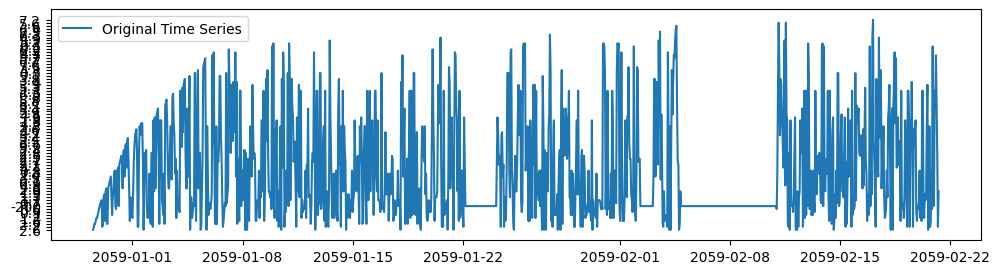

In [31]:
ts_1 = pd.Series(new_data[1:, 1], index=datetime_index)

plt.figure(figsize=(12, 3))
plt.plot(ts_1, label='Original Time Series')
plt.legend()

In [32]:
# Decompose time-series
result_add = seasonal_decompose(ts_1, model='additive')


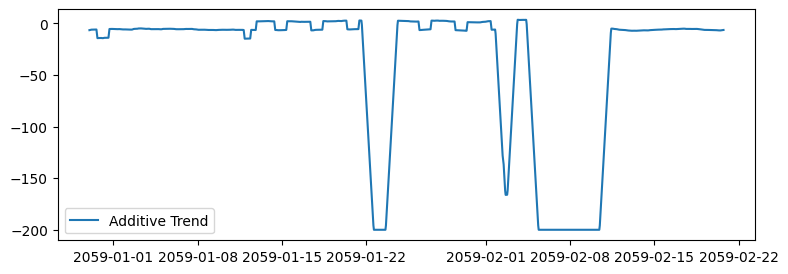

In [33]:
# Plotting 'Trend' Component

plt.figure(figsize=(9, 3))
plt.plot(result_add.trend, label='Additive Trend')
plt.legend()

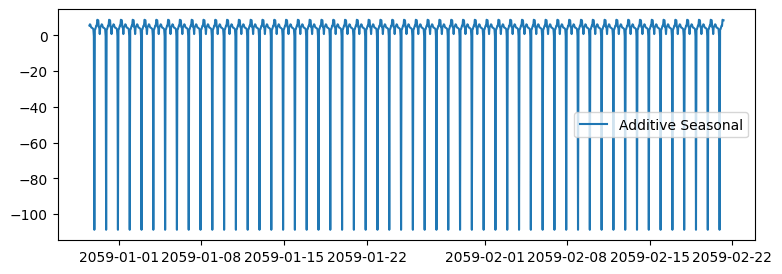

In [35]:
# Plotting 'Seasonal' Component

plt.figure(figsize=(9, 3))
plt.plot(result_add.seasonal, label='Additive Seasonal')
plt.legend()

In [37]:
# Calculating the Simple Moving Average (SMA)
   
sma_window = 6  # 7-hour moving average
sma = ts_1.rolling(window=sma_window).mean()
sma

2058-12-29 12:00:00          NaN
2058-12-29 13:00:00          NaN
2058-12-29 14:00:00          NaN
2058-12-29 15:00:00          NaN
2058-12-29 16:00:00          NaN
                         ...    
2059-02-21 02:00:00   -31.583333
2059-02-21 03:00:00   -31.083333
2059-02-21 04:00:00     2.666667
2059-02-21 05:00:00     2.883333
2059-02-21 06:00:00     2.983333
Freq: h, Length: 1291, dtype: float64

In [38]:
# Calculating the Exponential Moving Average (EMA)

ema_window = 24  # 24-hour moving average
ema = ts_1.ewm(span=ema_window, adjust=False).mean()
ema


2058-12-29 12:00:00     2.600000
2058-12-29 13:00:00     2.552000
2058-12-29 14:00:00     2.523840
2058-12-29 15:00:00     2.497933
2058-12-29 16:00:00     2.426098
                         ...    
2059-02-21 02:00:00   -11.456851
2059-02-21 03:00:00   -10.268303
2059-02-21 04:00:00    -9.246839
2059-02-21 05:00:00    -8.347092
2059-02-21 06:00:00    -7.527324
Freq: h, Length: 1291, dtype: float64

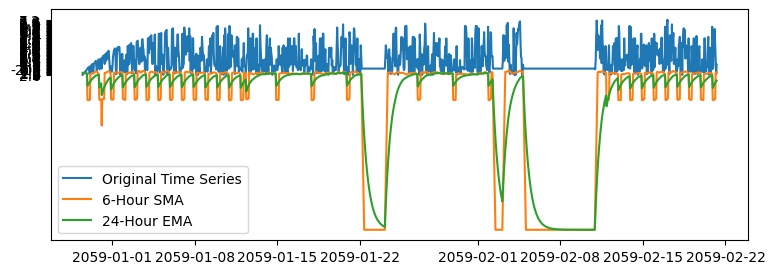

In [39]:
# Plotting the Moving Averages

plt.figure(figsize=(9, 3))
plt.plot(ts_1, label='Original Time Series')
plt.plot(sma, label=f'{sma_window}-Hour SMA')
plt.plot(ema, label=f'{ema_window}-Hour EMA')
plt.legend()